# DS_Taxi_strategy

## Тема:
«Формирование стратегии крупного агрегатора такси (поиск инсайтов, проверка гипотезы, составление рекомендаций стейкхолдерам, построение предиктивной модели)».

## Цель задания:
- Собрать все полученные на курсе знания воедино.
- Закрепить умение исследовать данные, проверять гипотезу, делать выводы и презентовать результаты.
- Закрепить умение исследовать внешние факторы, строить модель, получать прогноз и делать выводы.


## Задание:
### Введение:
Поздравляем! Вы попали на стажировку в одно из подразделений группы компаний, Вы — аналитик крупного агрегатора такси. Теперь перед вами стоит важная задача: самостоятельно провести исследование данных, проверить гипотезу о поведенческом предпочтении пользователей к определённому классу такси и сделать выводы, чтобы помочь компании стать лучшей на рынке. Успехов!



In [22]:
import numpy as np # Numerical Python
import pandas as pd # работа с данными
import matplotlib.pyplot as plt # визуализация
import scipy.stats # статистика

### 1	Загрузите файл dip_hw_x_taxi.csv в pandas dataframe

In [23]:
my_path = r'data/dip_hw_x_taxi.csv'
data = pd.read_csv(my_path)
data.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,23,53.114,Premium,1
1,436,3,10,5.781,Delivery,1
2,1327,6,19,16.200,Delivery,0
3,2013,2,2,13.732,Delivery,0
4,2241,6,3,20.436,Premium,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_gk           2000 non-null   int64  
 1   weekday_key        2000 non-null   int64  
 2   hour_key           2000 non-null   int64  
 3   distance_km        2000 non-null   float64
 4   offer_class_group  2000 non-null   object 
 5   driver_response    2000 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 93.9+ KB


Значение столбцов: 

- order_gk — идентификатор поездки;
- weekday_key — день недели совершения поездки;
- hour_key — час совершения поездки;
- distance_km — дистанция поездки;
- offer_class_group — класс поездки (Economy, Comfort, Premium, Delivery);
- driver_response — статус поездки (1 — поездка совершена; 0 — отмена).

### Вопросы:
1. Как распределяется количество поездок по дням недели? По часам? По часам в будни и в выходные? 

*Найти в какой день недели больше/меньше всего поездок? В какие часы?
В какие дни и часы наблюдается пик спроса на такси?*

2. Как распределяются поездки по классам? 

*Определить количество поезок каждого из них.
Какие классы поездок (Economy, Comfort, Premium, Delivery) наиболее популярны?*

3. В какой день / час больше или меньше всмего поездок для каждого класса?

*Выявить закономерности по периодам времени поездок по каждому классу сервиса.*

4. Какое среднее расстояние поездки для каждого класса?

   *Выявить закономерности в длине поездок по каждому классу сервиса.*

5. Каково отношение количества отмененных поездок ко всем поездкам? 


6. Какой процент отмененных поездок (driver_response = 0) в зависимости от времени дня и дня недели?

   *Найти периоды с наибольшей вероятностью отмены поездок.*

5. Поездки какого класса чаще всего отменяют? А в процентном соотношении по классам? 

*Есть ли зависимости между классом поездки и вероятностью ее отмены?*

6. Какие изменения в спросе и отменах поездок в разные дни недели и часы?




In [25]:
data['workday'] = data['weekday_key'] <= 5

<BarContainer object of 7 artists>

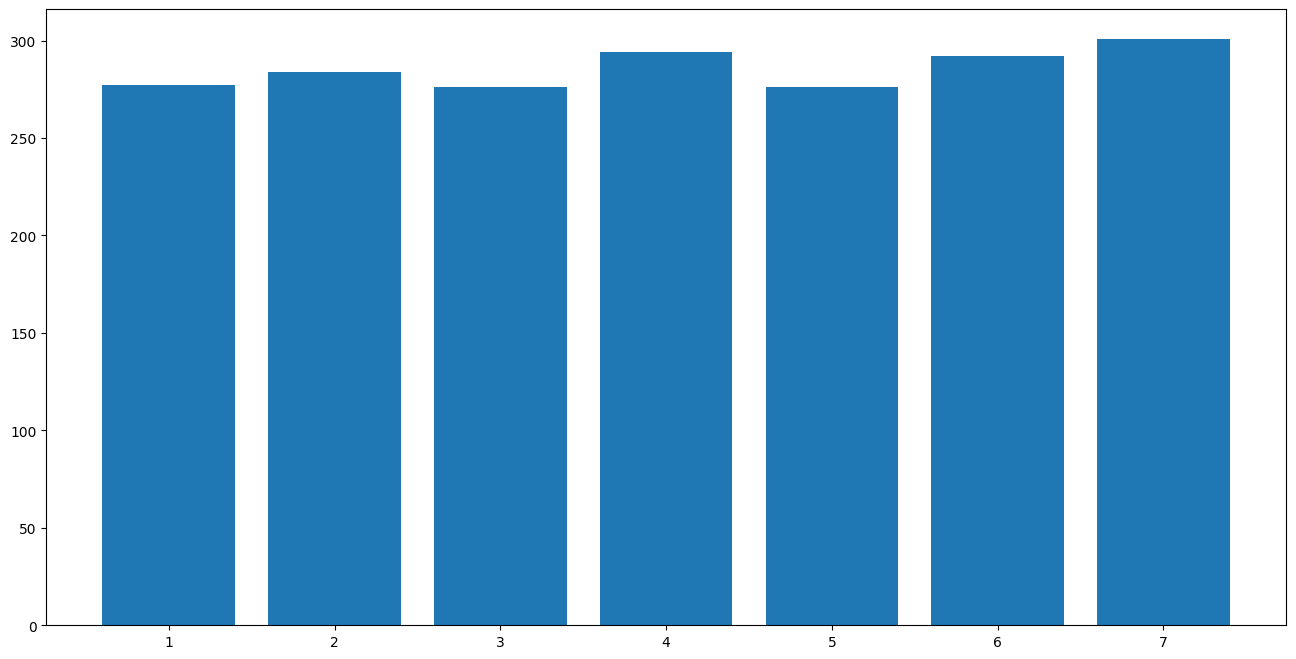

In [26]:
plt.figure(figsize=(16, 8))
trips_by_weekday = data['weekday_key'].value_counts()
plt.bar(trips_by_weekday.index, trips_by_weekday.values)

<BarContainer object of 24 artists>

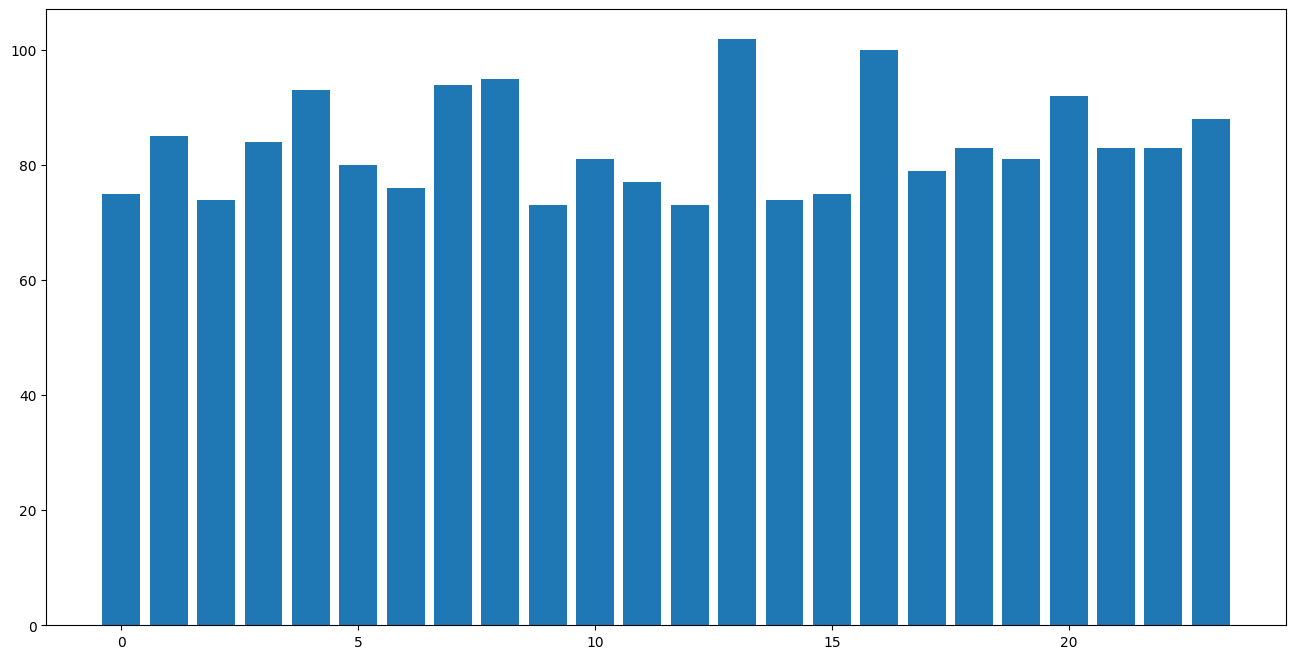

In [27]:
plt.figure(figsize=(16, 8))
trips_by_hour = data['hour_key'].value_counts()
plt.bar(trips_by_hour.index, trips_by_hour.values)

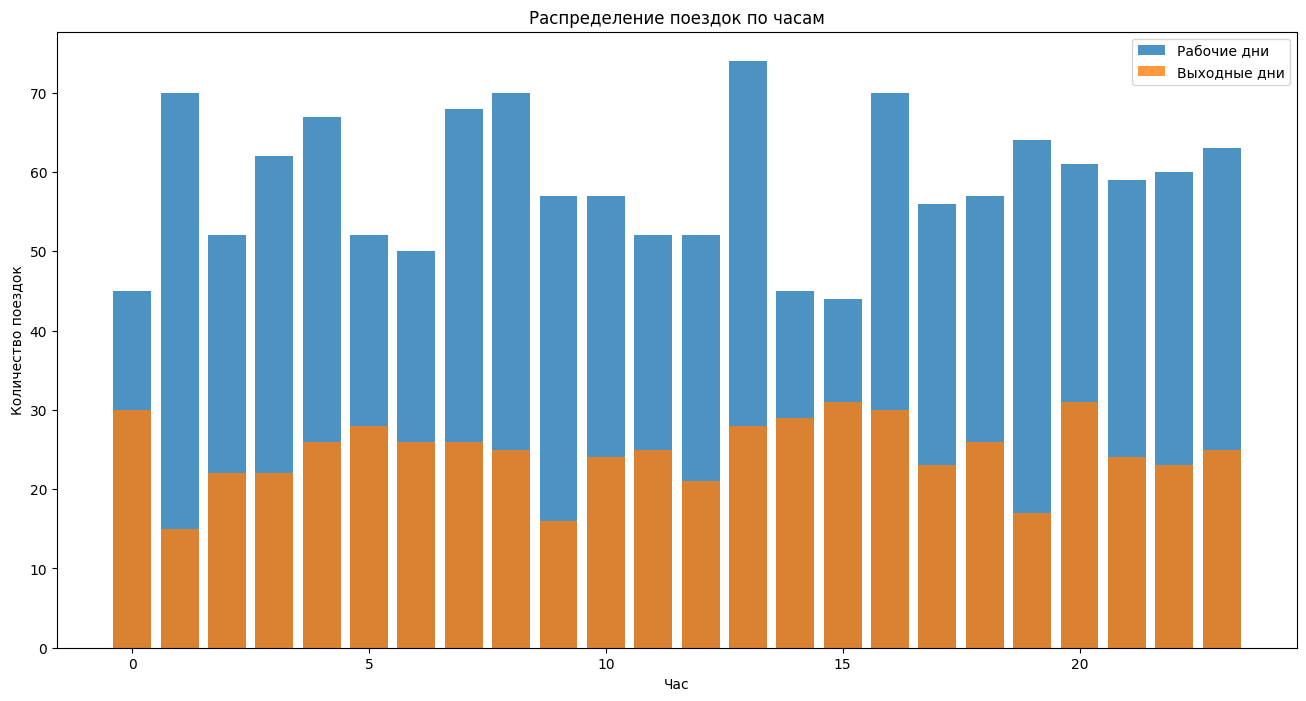

In [29]:
plt.figure(figsize=(16, 8))

# Фильтрация данных по рабочим и выходным дням
trips_by_hour_workday = data[data['workday'] == True]['hour_key'].value_counts()
trips_by_hour_weekend = data[data['workday'] == False]['hour_key'].value_counts()

plt.bar(trips_by_hour_workday.index, trips_by_hour_workday.values, alpha=0.8, label='Рабочие дни')
plt.bar(trips_by_hour_weekend.index, trips_by_hour_weekend.values, alpha=0.8, label='Выходные дни')

plt.title('Распределение поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()


In [34]:
# Дни недели и часы с наибольшим/наименьшим количеством поездок
weekday_dict = {1 : 'Понедельник', 2 : 'Вторник', 3 : 'Среда', 4 : 'Четверг',
                5 : 'Пятница', 6 : 'Суббота', 7 : 'Воскресенье'

}

print(f'Больше всего поездок в : {weekday_dict[trips_by_weekday.idxmax()]}')
print(f'Меньше всего поездок в : {weekday_dict[trips_by_weekday.idxmin()]}\n')
print(f'Пик спроса в  {trips_by_hour_workday.idxmax()}.00 (рабочий день)')
print(f'Минимум поездок в  {trips_by_hour_workday.idxmin()}.00 (рабочий день)\n')
print(f'Пик спроса в {trips_by_hour_weekend.idxmax()}.00 (выходной день)')
print(f'Минимум поездок в {trips_by_hour_weekend.idxmin()}.00 (выходной день)')

Больше всего поездок в : Воскресенье
Меньше всего поездок в : Среда

Пик спроса в  13.00 (рабочий день)
Минимум поездок в  15.00 (рабочий день)

Пик спроса в 20.00 (выходной день)
Минимум поездок в 1.00 (выходной день)


### Гипотезы:
1. В будние дни (weekday_key) наблюдается больше поездок в часы пик (hour_key), чем в выходные.


2. Эконом-класс чаще используется для коротких поездок (distance_km) по сравнению с Comfort и Premium.


3.  Поездки поздним вечером и ночью чаще отменяются, чем поездки в дневное время.

4. В выходные дни больше отмен по сравнению с будними.

5. Чем дальше поездка (distance_km), тем выше вероятность её отмены.


6. Premium класс имеет самую низкую вероятность отмены по сравнению с Economy и Comfort.

7. Пиковые часы дня (например, утро и вечер) приводят к большему числу отмен из-за перегруженности системы.

8. В выходные дни больше поездок на короткие дистанции (distance_km), чем в будние дни.


### 2	Рассчитайте основные описательные статистики (среднее, минимум, 25-50-75-персентили, максимум)

### 3	Вычислите количество значений по классам такси

### 4	Визуализируйте распределение дистанций поездок

### 5	Визуализируйте распределения дистанций поездок, по каждому классу такси в отдельности, а также определите типы распределений для эконом-класса и комфорт-класса
### 6	Сформируйте выборки по эконом и комфорт-классам. Визуализируйте пересечение интервалов дистанций этих классов 
(примечание: поможет функция seaborn.distplot или seaborn.kdeplot)
### 7	Проведите стат. тест 
(поможет: функция scipy.stats.ttest_ind), проверьте гипотезу, что дистанции поездок в комфорт-классе отличаются от дистанций поездок эконом-класса (примечание: H0 – выборки не отличаются, H1 – выборки отличны; уровень значимости = 5%)
### 8	Сделайте выводы по результатам проведения стат. теста
### 9	Вычислите средние выборок исследуемых классов, с учётом полученного результата проверки гипотез определите – какой из классов предпочитают на дальние поездки (эконом или комфорт)
### 10	Оформите презентацию для демонстрации результатов стейкхолдерам (примечание: для оформления воспользуйтесь шаблоном)
